# Analysis of Bike Share Data - Divvy Dataset

This Case Study was completed as part of the Google Data Analytics Professional Certificate.
(This is the Python version of the project)

Scenario:
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently.

Data Source: https://divvy-tripdata.s3.amazonaws.com/index.html. Data is organized by months and considered to be credible since it was directly downloaded from the source website.
Data from the past 1 year has been downloaded from the divvy data site containing 12 csv files from Oct 2020 to Sept 2021.

#### Ask Phase :: Business Objective - How do annual members and casual riders use Cyclistic bikes differently?

## STEP 1: Prepare - Collect and Combine the data 

In [1]:
# import numpy and pandas libararies
import numpy as np
import pandas as pd

In [2]:
# Read all the 12 CSV files into individual dataframes 

df1 = pd.read_csv('./BikeShare_Data/202010-divvy-tripdata.csv')
df2 = pd.read_csv('./BikeShare_Data/202011-divvy-tripdata.csv')
df3 = pd.read_csv('./BikeShare_Data/202012-divvy-tripdata.csv')
df4 = pd.read_csv('./BikeShare_Data/202101-divvy-tripdata.csv')
df5 = pd.read_csv('./BikeShare_Data/202102-divvy-tripdata.csv')
df6 = pd.read_csv('./BikeShare_Data/202103-divvy-tripdata.csv')
df7 = pd.read_csv('./BikeShare_Data/202104-divvy-tripdata.csv')
df8 = pd.read_csv('./BikeShare_Data/202105-divvy-tripdata.csv')
df9 = pd.read_csv('./BikeShare_Data/202106-divvy-tripdata.csv')
df10 = pd.read_csv('./BikeShare_Data/202107-divvy-tripdata.csv')
df11 = pd.read_csv('./BikeShare_Data/202108-divvy-tripdata.csv')
df12 = pd.read_csv('./BikeShare_Data/202109-divvy-tripdata.csv')

In [3]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 ]

In [4]:
bike_df = pd.concat(frames, ignore_index=True, sort=False)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136261 entries, 0 to 5136260
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 509.4+ MB


In [6]:
bike_df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.136261e+06,5.136261e+06,5.131440e+06,5.131440e+06
mean,4.190240e+01,-8.764559e+01,4.190269e+01,-8.764581e+01
std,4.489459e-02,2.742823e-02,4.499254e-02,2.759811e-02
min,4.164000e+01,-8.784000e+01,4.151000e+01,-8.807000e+01
25%,4.188213e+01,-8.765975e+01,4.188224e+01,-8.766000e+01
50%,4.190000e+01,-8.764170e+01,4.190000e+01,-8.764182e+01
75%,4.192947e+01,-8.762773e+01,4.192955e+01,-8.762775e+01
max,4.208000e+01,-8.752000e+01,4.216812e+01,-8.744000e+01


In [7]:
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual


## STEP 2: Process - Clean the data 

Following are the steps involved in the cleaning of the data: 

* From the info of the dataframe we can see that the columns started_at and ended_at are not datetime objects. Convert these 2 columns to datetime objects.
* Add a column called trip_length, calculated by subtracting started_at from ended_at.
* Add columns - month, day,	year, day_of_week. 
* Remove rows with negative trip length.
* Remove rows with null end lat/long.
* Remove rows with null start_station_name/end_station_name

In [8]:
type(bike_df['started_at'].iloc[0])

str

In [9]:
type(bike_df['ended_at'].iloc[0])

str

In [10]:
# Change the data type of 'started_at' and 'ended_at' columns from str to DateTime object

bike_df['started_at'] = pd.to_datetime(bike_df['started_at'] )
bike_df['ended_at'] = pd.to_datetime(bike_df['ended_at'] )

In [11]:
#type(bike_df['started_at'].iloc[0])

In [12]:
# Add additional column trip_length in minutes (ended_at - started_at)

bike_df['trip_length'] = (bike_df['ended_at'] - bike_df['started_at']).dt.total_seconds()/60

In [13]:
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual,17.483333
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual,14.133333
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual,8.350000
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual,2.866667
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual,16.216667


In [14]:
# Add additional columns such as  month, day, year, day of the week which will be useful in future analysis

bike_df['hour'] = bike_df['started_at'].apply(lambda time: time.hour)
bike_df['month'] = bike_df['started_at'].apply(lambda time: time.month)
bike_df['day'] = bike_df['started_at'].apply(lambda time: time.day)
bike_df['year'] = bike_df['started_at'].apply(lambda time: time.year)
bike_df['day_of_week'] = bike_df['started_at'].apply(lambda time: time.dayofweek)

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_df['day_of_week'] = bike_df['day_of_week'].map(dmap)

In [16]:
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length,hour,month,day,year,day_of_week
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual,17.483333,19,10,31,2020,Sat
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual,14.133333,23,10,31,2020,Sat
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual,8.350000,23,10,31,2020,Sat
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual,2.866667,22,10,31,2020,Sat
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual,16.216667,19,10,31,2020,Sat


In [17]:
bike_df.describe()

,start_lat,start_lng,end_lat,end_lng,trip_length,hour,month,day,year
count,5.136261e+06,5.136261e+06,5.131440e+06,5.131440e+06,5.136261e+06,5.136261e+06,5.136261e+06,5.136261e+06,5.136261e+06
mean,4.190240e+01,-8.764559e+01,4.190269e+01,-8.764581e+01,2.062347e+01,1.428986e+01,7.122985e+00,1.550376e+01,2.020848e+03
std,4.489459e-02,2.742823e-02,4.499254e-02,2.759811e-02,3.033134e+02,4.982028e+00,2.374832e+00,8.784152e+00,3.588756e-01
min,4.164000e+01,-8.784000e+01,4.151000e+01,-8.807000e+01,-2.904997e+04,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03
25%,4.188213e+01,-8.765975e+01,4.188224e+01,-8.766000e+01,7.083333e+00,1.100000e+01,6.000000e+00,8.000000e+00,2.021000e+03
50%,4.190000e+01,-8.764170e+01,4.190000e+01,-8.764182e+01,1.260000e+01,1.500000e+01,7.000000e+00,1.500000e+01,2.021000e+03
75%,4.192947e+01,-8.762773e+01,4.192955e+01,-8.762775e+01,2.280000e+01,1.800000e+01,9.000000e+00,2.300000e+01,2.021000e+03
max,4.208000e+01,-8.752000e+01,4.216812e+01,-8.744000e+01,5.594415e+04,2.300000e+01,1.200000e+01,3.100000e+01,2.021000e+03


In [18]:
# Remove rows with trip length less than 1 min and more than 24 hrs (1440 min)
# Remove rows with null end_lat and end_lng
# Remove rows with null start_station_name and end_station_name
# Remove rows with start_station_name containing value as TEST


clean_df = bike_df[(bike_df['trip_length']>=1) & (bike_df['trip_length']<= 1440)]
clean_df = clean_df.dropna(subset=['end_lat'])
clean_df = clean_df.dropna(subset=['end_lng'])
clean_df = clean_df.dropna(subset=['start_station_name'])
clean_df = clean_df.dropna(subset=['end_station_name'])
clean_df = clean_df[~clean_df['start_station_name'].str.contains('TEST')]

In [19]:
#clean_df[clean_df['start_station_name'].str.contains('TEST')].count()['ride_id']
#clean_df.count()['ride_id']

In [20]:
# Checking for duplicate value of ride_id -- no duplicates found
clean_df[clean_df.duplicated(subset=['ride_id']) == True].count()['ride_id']

0

In [21]:
# Check the values in categorical columns - rideable_type and member_casual
clean_df['rideable_type'].unique()

array(['electric_bike', 'docked_bike', 'classic_bike'], dtype=object)

In [22]:
clean_df['member_casual'].unique()

array(['casual', 'member'], dtype=object)

In [23]:
# Save the cleaned data for creating visualizations in tools like Tableau
clean_df.to_csv('./BikeShare_Data/clean_tripdata.csv', index=False)

## STEP 3: Analyze - Exploratory Data Analysis (EDA)

Before creating visualizations with the data, let's do some EDA of the data which will highlight major patterns and trends of the data.

In [24]:
#import required libraries

import numpy as np
import pandas as pd

#import visualization libraries and set %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [96]:
data = pd.read_csv('./BikeShare_Data/clean_tripdata.csv')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4294164 entries, 0 to 4294163
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  trip_length         float64
 14  hour                int64  
 15  month               int64  
 16  day                 int64  
 17  year                int64  
 18  day_of_week         object 
dtypes: float64(5), int64(4), object(10)
memory usage: 622.5+ MB


In [98]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,trip_length,hour,month,day,year
count,4.294164e+06,4.294164e+06,4.294164e+06,4.294164e+06,4.294164e+06,4.294164e+06,4.294164e+06,4.294164e+06,4.294164e+06
mean,4.190380e+01,-8.764355e+01,4.190410e+01,-8.764379e+01,2.084094e+01,1.428577e+01,7.101184e+00,1.545603e+01,2.020845e+03
std,4.009587e-02,2.331233e-02,4.022897e-02,2.350829e-02,3.705358e+01,4.931194e+00,2.398234e+00,8.784215e+00,3.615513e-01
min,4.164850e+01,-8.783000e+01,4.164850e+01,-8.783000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03
25%,4.188286e+01,-8.765549e+01,4.188317e+01,-8.765571e+01,7.400000e+00,1.100000e+01,6.000000e+00,8.000000e+00,2.021000e+03
50%,4.189859e+01,-8.764055e+01,4.189897e+01,-8.764098e+01,1.286667e+01,1.500000e+01,7.000000e+00,1.500000e+01,2.021000e+03
75%,4.192871e+01,-8.762769e+01,4.192877e+01,-8.762769e+01,2.318333e+01,1.800000e+01,9.000000e+00,2.300000e+01,2.021000e+03
max,4.206485e+01,-8.752823e+01,4.216812e+01,-8.752452e+01,1.439900e+03,2.300000e+01,1.200000e+01,3.100000e+01,2.021000e+03


In [99]:
data.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_length,hour,month,day,year,day_of_week
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual,17.483333,19,10,31,2020,Sat
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual,14.133333,23,10,31,2020,Sat


** Basic Values

In [100]:
data['trip_length'].mean()

20.840943964878285

In [101]:
data['trip_length'].median()

12.866666666666667

In [102]:
data['trip_length'].max()/60

23.998333333333335

In [103]:
data['trip_length'].min()/60

0.01666666666666667

In [104]:
# Trip count by month
data.groupby('month')['ride_id'].count()

month
1      82607
2      42278
3     203317
4     294513
5     444939
6     600256
7     683009
8     665974
9     613266
10    332400
11    219256
12    112349
Name: ride_id, dtype: int64

In [105]:
# Trip count by day of the week
data.groupby('day_of_week')['ride_id'].count()

day_of_week
Fri    616476
Mon    535884
Sat    781103
Sun    668230
Thu    577197
Tue    547839
Wed    567435
Name: ride_id, dtype: int64

In [106]:
#Trip duration (in hrs) by month 
data.groupby('month')['trip_length'].sum()/60

month
1      19242.313611
2      12862.026389
3      70137.279444
4     106541.934722
5     175439.429722
6     227397.162500
7     249242.349444
8     229197.513056
9     199603.615833
10    105477.935833
11     68447.429167
12     27984.865278
Name: trip_length, dtype: float64

## STEP 4: Create Visualizations

Text(0.5, 1.0, 'Casual Riders Vs Annual Members')

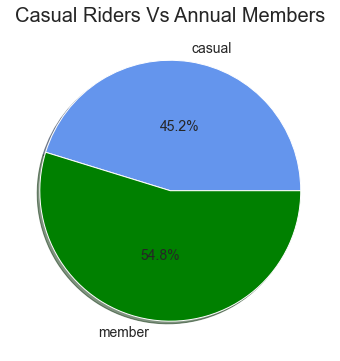

In [121]:
# Number of Casual Riders Vs Annual members
df_cnt = data.groupby('member_casual')['ride_id'].count()
mycolor=['CornflowerBlue','green']

plt.figure(figsize=(12,6))
labels = df_cnt.keys()
plt.pie(x=df_cnt, autopct="%.1f%%", labels=labels, pctdistance=0.5,shadow = True,colors=mycolor,textprops={'fontsize': 14})
plt.title("Casual Riders Vs Annual Members", fontsize=20)


** Number of Casual Riders are less than Annual Members

In [109]:
# Average Trip Length (in min) of Casual Riders Vs Annual members
avg_length = data.groupby('member_casual')['trip_length'].mean()
df1 = avg_length.to_frame().reset_index()
df1.head()

,member_casual,trip_length
0,casual,29.302123
1,member,13.851301


Text(0.5, 1.0, 'Chart 2: Average Trip Duration (min) of Casual Riders Vs Annual members')

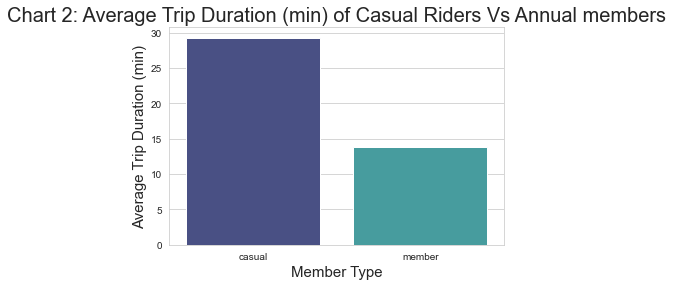

In [120]:

sns.barplot(x='member_casual',y='trip_length',data=df1, palette='mako')

plt.xlabel("Member Type", fontsize=15)
plt.ylabel("Average Trip Duration (min)", fontsize=15)
plt.title("Average Trip Duration (min) of Casual Riders Vs Annual members", fontsize=20)

** Average Trip Duration of Casual Riders is more than that of Annual Members

Text(0.5, 1.0, 'Monthly Dsitribution of Trips')

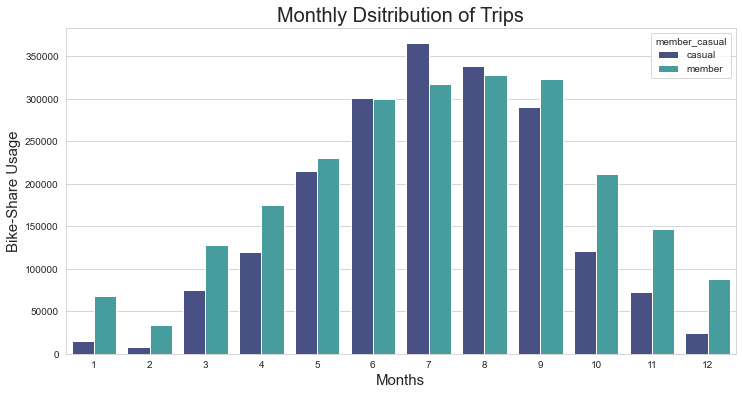

In [41]:
# Monthly Dsitribution of Trips 
plt.figure(figsize=(12,6))
sns.countplot(x='month',data=data, hue='member_casual',palette='mako')

plt.xlabel("Months", fontsize=15)
plt.ylabel("Bike-Share Usage", fontsize=15)
plt.title("Monthly Dsitribution of Trips", fontsize=20)

** For both casual and members, the summer months of June, July, August, September are the most popular months.

Text(0.5, 1.0, 'Daily Dsitribution of Trips')

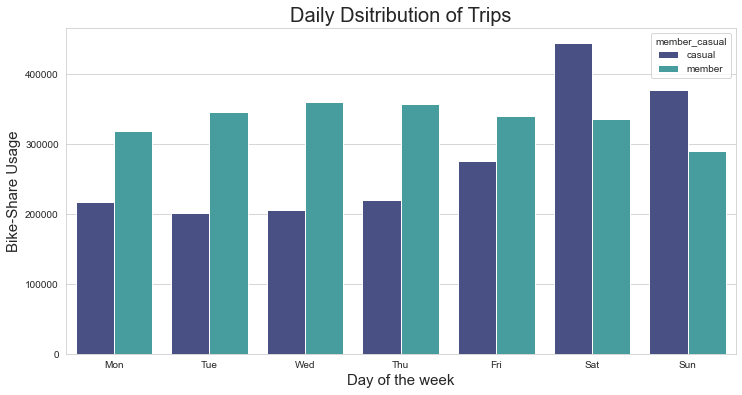

In [42]:
# Daily Dsitribution of Trips
plt.figure(figsize=(12,6))
sns.countplot(x='day_of_week',data=data, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], 
              hue='member_casual',palette='mako' )

plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Bike-Share Usage", fontsize=15)
plt.title("Daily Dsitribution of Trips", fontsize=20)


* Here, we can see that there is a difference between the behaviour of casual riders and annual members.
* For casual riders, the weekends are the most popular days to use bike-share.
* For annual members, the weekdays are the most popular days with minimum usage on Sundays.



In [43]:
data_heatmap_casual = data[data['member_casual']=='casual'].groupby(by=['month','day_of_week'])['ride_id'].count().unstack()
data_heatmap_member = data[data['member_casual']=='member'].groupby(by=['month','day_of_week'])['ride_id'].count().unstack()

Text(0.5, 1.0, 'Casual Riders - Heatmap of Day of the week Vs Months')

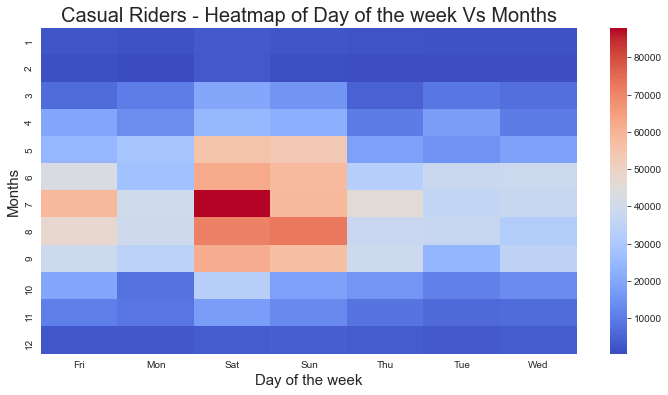

In [81]:
#Casual Riders - Heatmap of Months Vs Day of the week
plt.figure(figsize=(12,6))
sns.heatmap(data_heatmap_casual,cmap='coolwarm')

plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Months", fontsize=15)
plt.title("Casual Riders - Heatmap of Day of the week Vs Months", fontsize=20)

Text(0.5, 1.0, 'Annual Members - Heatmap of Day of the week Vs Months')

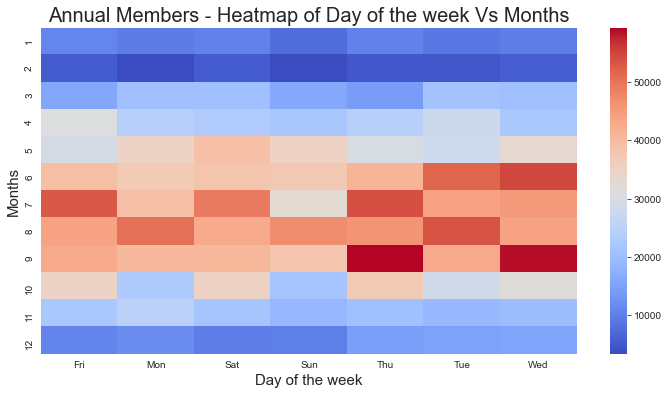

In [82]:
#Annual Members - Heatmap of Months Vs Day of the week
plt.figure(figsize=(12,6))
sns.heatmap(data_heatmap_member,cmap='coolwarm')

plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Months", fontsize=15)
plt.title("Annual Members - Heatmap of Day of the week Vs Months", fontsize=20)

In [83]:
#Most popular time of day

data_byhr_casual=data[data['member_casual']=='casual'].groupby(by=['hour','day_of_week'])['ride_id'].count().unstack()
data_byhr_member=data[data['member_casual']=='member'].groupby(by=['hour','day_of_week'])['ride_id'].count().unstack()

Text(0.5, 1.0, 'Casual Riders - Heatmap of Day of the week Vs Time of the Day')

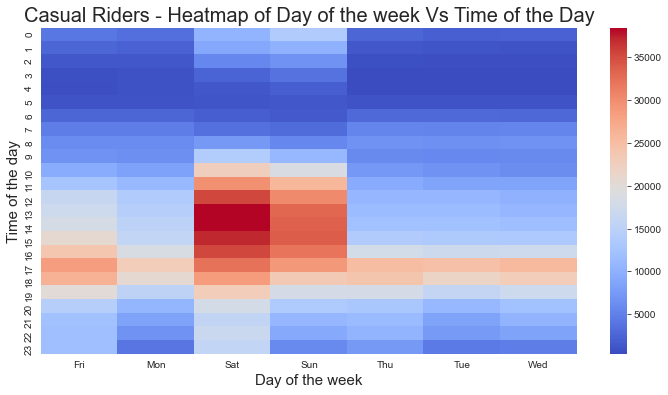

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(data_byhr_casual,cmap='coolwarm')

plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Time of the day", fontsize=15)
plt.title("Casual Riders - Heatmap of Day of the week Vs Time of the Day", fontsize=20)

Text(0.5, 1.0, 'Annual Members - Heatmap of Day of the week Vs Time of the Day')

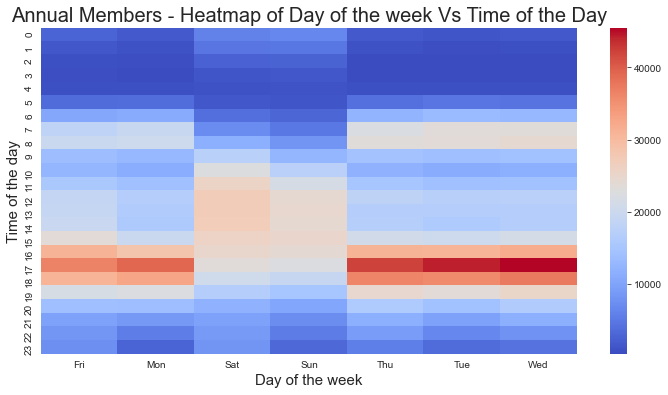

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(data_byhr_member,cmap='coolwarm')

plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Time of the day", fontsize=15)
plt.title("Annual Members - Heatmap of Day of the week Vs Time of the Day", fontsize=20)

## STEP 5: Act Phase - Recommendations & Key take aways

### Conclusion

From all the above charts, we can conclude the following:

For Casual Riders:
 * Most popular Months are June-Sept
 * Most popular Day and Time is Saturday and Sunday between 12 to 4 PM
 
For Annual Members:
 * Most popular Months are June-Sept
 * Most popular Day and Time is Monday to Friday between 4 to 6 PM
 
Hence, we can conclude that Casual Riders are mostly who visit the city for leisure/sightseeing etc on weekends.
In contrast, the Annual Members are people who use the bike-share service to go to work/office on weekdays.

However, there are some casual riders who use the bike-share service for office/school commute but have still not taken the annual membership. May be due to the one time high cost of the registration. This needs to be addressed and people need to be made aware that annual mebership will be more cost effective in the long term.

### Recommendation for converting casual riders into annual members : 

1. Focus should be on converting the casual riders who use the bike share service for commuting but still do not have an annual membership. Marketing emails/Ads can be sent to these select casual riders to tell them the benefits of having annual membership and the cost effectiveness of the membership.
2. Discount coupons for Annual Membership registration can be provided who have used the bike share service for more than some particular hrs, say 5 hours.
3. Since the casual riders use the bike share service mostly in summers, all the digital campaign should be done majorly in summer seasons from June to September. 